# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

## 1. Cargamos los datos

In [104]:
df = pd.read_csv("data/df_furniture.csv")
df

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


## 2. Tratar la fecha como texto y parsear

In [105]:
df["Date"]= pd.to_datetime(df["Month"], errors="coerce")
df["Date"] = df["Date"].interpolate()
df["Date"] = df["Date"].apply(lambda x: x + pd.DateOffset(month=1) if x.day != 1 else x)
df["Date"] = df["Date"].dt.strftime("%Y-%m")
df["Year"] = df["Date"].str.split("-", expand=True)[0].astype(int)
df["Month"] = df["Date"].str.split("-", expand=True)[1].astype(int)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df

,Month,furniture_price_adjusted,Year
Date,,,
1992-01-01,1,2073.432724,1992
1992-02-01,2,2114.485812,1992
1992-03-01,3,2260.570891,1992
1992-04-01,4,2255.103236,1992
1992-05-01,5,2331.414618,1992
...,...,...,...
2019-03-01,3,9718.107698,2019
2019-04-01,4,9248.814254,2019
2019-05-01,5,10001.305304,2019


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331 entries, 1992-01-01 to 2019-07-01
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     331 non-null    int64  
 1   furniture_price_adjusted  331 non-null    float64
 2   Year                      331 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 10.3 KB


In [107]:
df.describe()

,Month,furniture_price_adjusted,Year
count,331.000000,331.000000,331.000000
mean,6.429003,5975.765787,2005.296073
std,3.472438,2092.867819,7.977048
min,1.000000,2073.432724,1992.000000
25%,3.000000,4280.088499,1998.000000
50%,6.000000,6075.405272,2005.000000
75%,9.000000,7381.403461,2012.000000
max,12.000000,10833.501852,2019.000000


## 3. ¿De qué fecha a qué fecha va el histórico?

La serie va desde enero de 1992 a julio de 2019

In [108]:
df.describe()

,Month,furniture_price_adjusted,Year
count,331.000000,331.000000,331.000000
mean,6.429003,5975.765787,2005.296073
std,3.472438,2092.867819,7.977048
min,1.000000,2073.432724,1992.000000
25%,3.000000,4280.088499,1998.000000
50%,6.000000,6075.405272,2005.000000
75%,9.000000,7381.403461,2012.000000
max,12.000000,10833.501852,2019.000000


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

Se ve que tiene una clara tendencia al alza, a pesar de una pequeña bajada en als acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

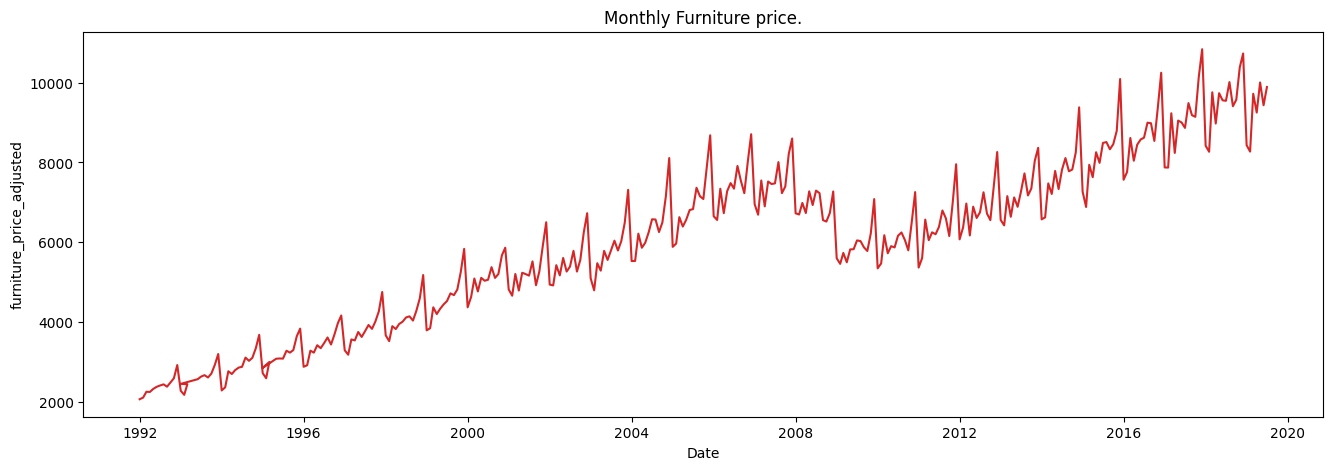

In [109]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='furniture_price_adjusted', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df["furniture_price_adjusted"], title='Monthly Furniture price.') 

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [110]:
result = adfuller(df['furniture_price_adjusted'].values)
result[1]


0.7035529748090005

In [111]:
result = kpss(df['furniture_price_adjusted'].values)
result[1]

0.01

In [ ]:
#No es estacionaria

## 6. ¿Conoces algún método para representar mejor la tendencia?

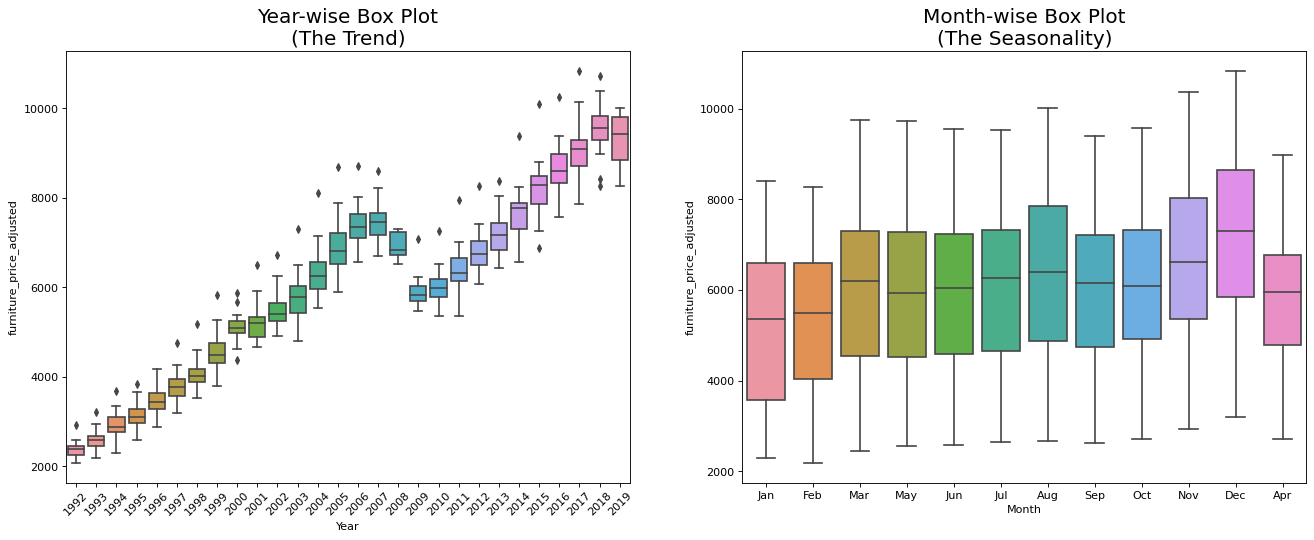

In [112]:
# Prepare data
df['Year'] = [d.year for d in df.index]
df['Month'] = [d.strftime('%b') for d in df.index]
years = df['Year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='furniture_price_adjusted', data=df, ax=axes[0])
sns.boxplot(x='Month', y='furniture_price_adjusted', data=df.loc[~df.index.year.isin([1992, 2019]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45) 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

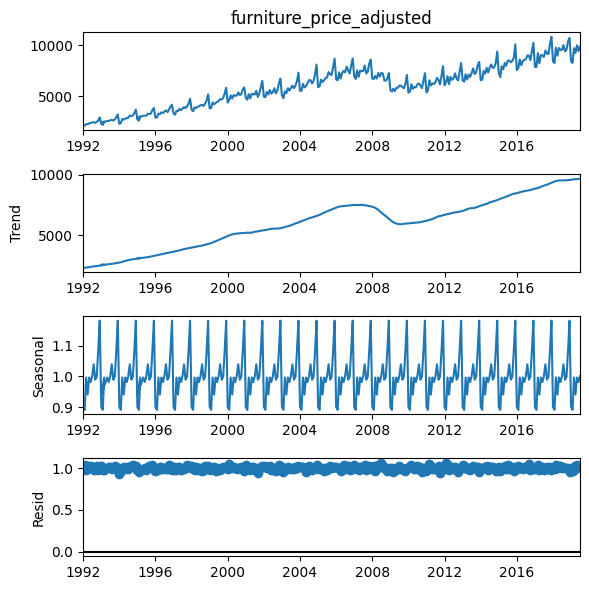

In [113]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df["furniture_price_adjusted"], model = 'multiplicative', extrapolate_trend = 'freq', period=12)

# Additive Decomposition
result_add = seasonal_decompose(df["furniture_price_adjusted"], model = 'additive', extrapolate_trend = 'freq', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

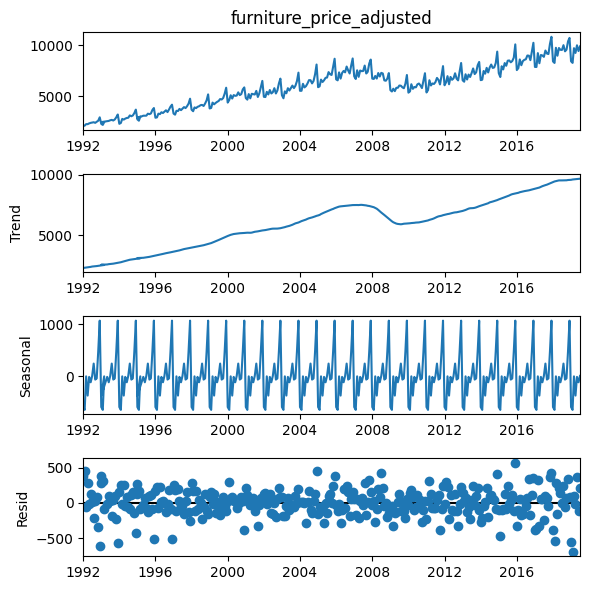

In [114]:
result_add.plot();

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

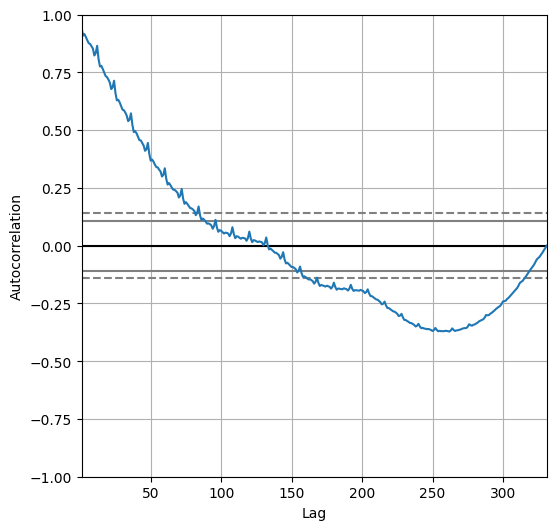

In [115]:
autocorrelation_plot(df["furniture_price_adjusted"].values);

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

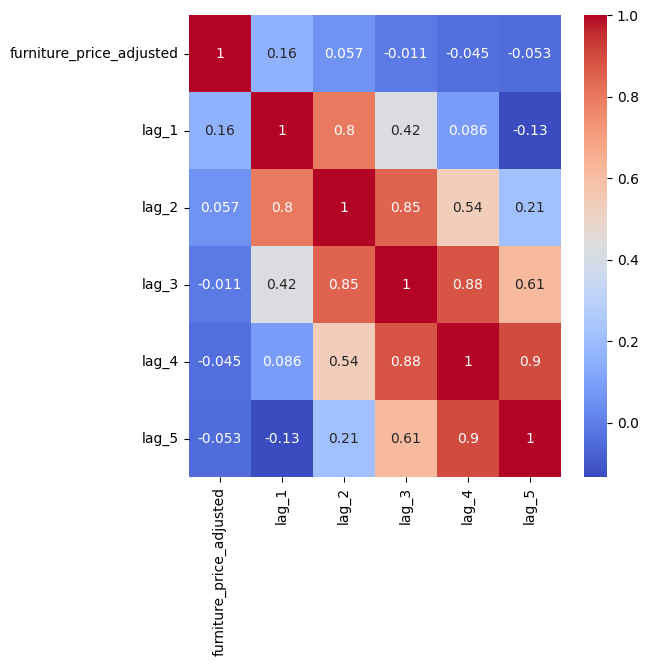

In [116]:
df[f'lag_1'] = df['furniture_price_adjusted'].diff()
for i in range(1, 5):
    df[f'lag_{i+1}'] = df[f'lag_{i}'].diff()

correlation_matrix = df.drop(["Year"], axis=1).corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [117]:
# Observando la gráfica de autocorrelación se puede ver quue la seasonality se cumple cada 12 meses.

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

0.025288379295711785


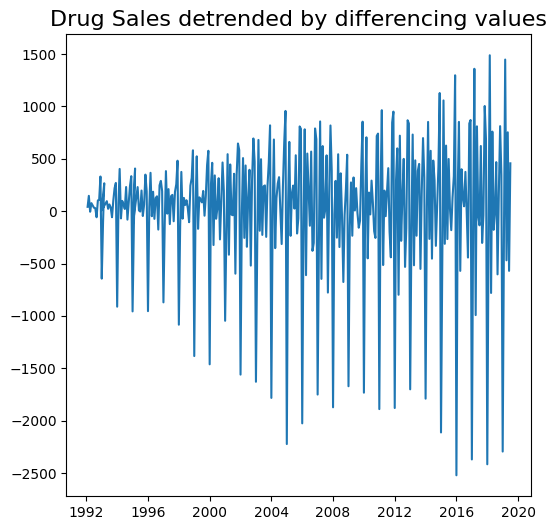

In [118]:
plt.plot(df["furniture_price_adjusted"].diff())
print(adfuller(df["furniture_price_adjusted"].diff().dropna().values)[1])
plt.title('Drug Sales detrended by differencing values', fontsize=16);

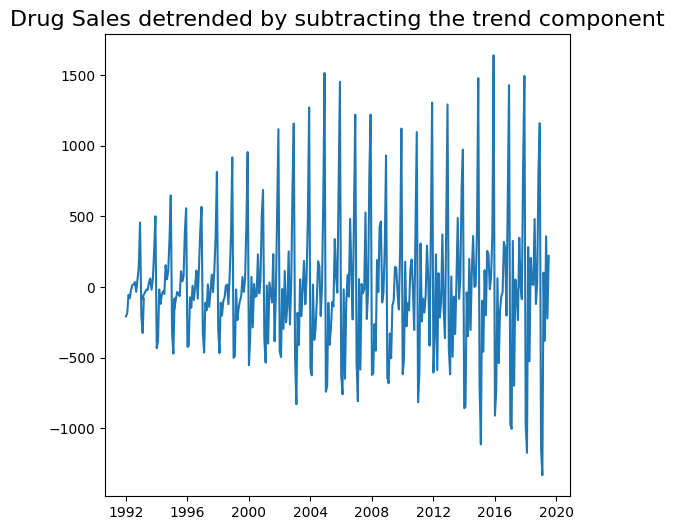

In [119]:
detrended = df["furniture_price_adjusted"].values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16);